<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/python_basic/Series2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybithumb

     |████████████████████████████████| 51 kB 284 kB/s 
     |████████████████████████████████| 112 kB 10.4 MB/s 
     |████████████████████████████████| 251 kB 47.9 MB/s 


In [ ]:
import pybithumb
btc = pybithumb.get_candlestick("BTC")
xrp = pybithumb.get_candlestick("XRP")

In [ ]:
btc['close'].values

array([  755000.,   750000.,   739000., ..., 50321000., 49418000.,
       50869000.])

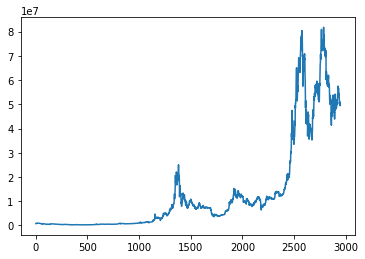

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(btc['close'].values)), btc['close'].values)

In [ ]:
len(btc['close'][-1000:]), len(xrp['close'][-1000:])

(1000, 1000)

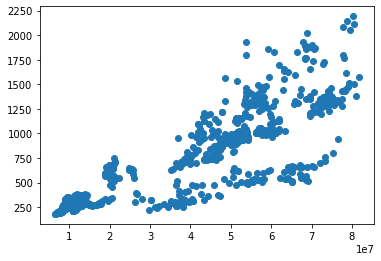

In [ ]:
plt.scatter(btc['close'][-1000:], xrp['close'][-1000:])

In [ ]:
'''
행렬 식 모양을 만들기 위해서 ax + b = y 형태를 만든다.

(btc(x) , 1) * (a)  = xrp(y) 
               (b)

'''

In [ ]:
b0 = btc['close'].values[-1000:].reshape(-1 ,1)
b0

In [ ]:
o = np.ones( (1000, 1), dtype=np.uint32)
o.shape

(1000, 1)

In [ ]:
a = np.hstack( (b0,o))
a

array([[1.1582e+07, 1.0000e+00],
       [1.1252e+07, 1.0000e+00],
       [1.1328e+07, 1.0000e+00],
       ...,
       [5.0321e+07, 1.0000e+00],
       [4.9418e+07, 1.0000e+00],
       [5.1017e+07, 1.0000e+00]])

In [ ]:
x =xrp['close'].values[-1000:].reshape(-1,1)
x.shape

(1000, 1)

In [ ]:
# v : 해의 값(x,y) np.linalg.pinv : 역행렬
v = np.linalg.pinv( a) @ x #  #위의 식 역행렬을 각 각 더해줘서 v(a b) 값을 구한다.
a = v[0,0]
b = v[1,0]
v

array([[1.69858885e-05],
       [8.54179808e+01]])

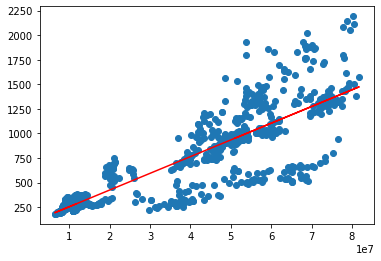

In [ ]:
plt.scatter(btc['close'].values[-1000:], xrp['close'].values[-1000:])
x = btc['close'].values[-1000:]
y = a*x +b
plt.plot(x,y,color='r')

## 판다스 (Pandas) 라이브러리

### 데이터 타입 변환

시리즈에 저장된 데이터가 문자열 타입으로 저장돼 있다고 가정해봅시다. 이러한 경우 덧셈 및 뺄셈 등의 연산을 적용할 수 없기 때문에 데이터 타입을 변경할 수 있어야 합니다. 

In [ ]:
s = Series(["100", "200", "300"])
print(s.dtype)

object


`astype` 메서드는 데이터의 타입을 변경합니다. 

In [ ]:

print(s.dtype)

object


만약 문자열 데이터에 콤마(`,`)가 파함돼 있다면 `astype` 메서드는 변환에 실패하고 에러 메시지를 출력합니다.   

In [ ]:
s = Series(["1,000", "2,000", "3,000"])



`ValueError: invalid literal for int() with base 10: '1,000'`

시리즈의 `replace` 메서드를 사용하면 데이터를 한 번에 치환할 수 있습니다. 

In [ ]:
s = Series(["1,000", "2,000", "3,000"])
s.replace("", "")


0    1,000
1    2,000
2    3,000
dtype: object

`regex` 옵션을 추가하면 패턴을 검색한 후 치환을 시도합니다. (문자열의 replace와 이름은 동일하고 동작은 유사하지만 다른 클래스의 메서드입니다.)

불필요한 데이터를 치환한 다음 타입을 변경합니다. 

Q. Series에 저장된 값을 다음과 같이 변경하라. 

| index | values | 
| ---- | ---- |
| 0 | 38000 | 
| 1 | 28000 | 

In [ ]:
s = Series(["3만 8천", " 2만 8천"])



### 시리즈와 Map
시리즈를 사용하다 보면 시리즈가 지원하는 기본 연산 (덧셈, 뺄셈, 곱셈, 나눗셈) 이외에도 복잡한 형태의 사용자 정의 코드를 적용하고 싶은 경우가 있습니다. 예를 들어 시리즈에 저장된 성적을 학점으로 변경하기 위한 파이썬의 기본 함수는 없습니다. 사용자가 작성한 함수를 전체 시리즈에 적용하는 방법이 필요한데, 이를 `map` 함수로 해결합니다. 

In [ ]:
s = Series([3, 13, 23])
print(s)

0     3
1    13
2    23
dtype: int64


시리즈의 점수를 다음 조건의 학점으로 변경해 봅시다. 

| 점수구간 | 학점 |
| ---- | ---- |
| 20 - 29 | A |
| 10 - 19 | B |
| 0 - 9 | C |

`cut` 함수를 사용하면 더욱 쉽게 수치형 데이터를 범주형 데이터로 변환할 수 있습니다.   
- `bins`와 `labels` 옵션을 사용합니다. 

Q. `map` 연산을 사용해서 시리즈에 저장된 값으로 학점을 판별하라.
- 90점 이상이면 A
- 70점 이상이면 B
- 나머지 F

연산 적용 결과
```
영수    A
철수    B
영희    F
```

In [ ]:
s = Series([94, 74, 30], index=['영수', '철수', '영희'])


Q. `map` 연산을 사용해서 시리즈에 저장된 값에 다음 연산을 적용하라. 
- 0 이상 이면 값을 2배 키우고,
- 0 보다 작으면 값을 10 뺀다

연산 적용 결과
```
0    20
1     6
2   -13
dtype: int64
```

In [ ]:
s = Series([10, 3, -3])

### 시리즈 정렬
`sort_values` 메서드를 사용하면 쉽게 데이터를 정렬할 수 있습니다.  
- `ascending` 값에 따라 오름차순 혹은 내림차순으로 정렬됩니다. 

In [ ]:
from pandas import Series

data = [3.1, 2.0, 10.1, 5.1]
index = ["000010", "000020", "000030", "000040"]
s = Series(data=data, index=index)



`sort_index` 메서드는 인덱스를 기준으로 정렬합니다.

### 데이터 순위
`rank` 메서드는 순위를 측정합니다.

### 데이터 갯수 세기

시리즈에 저장된 데이터들의 출현 빈도를 세는 함수 `value_counts`

In [ ]:
import numpy as np

s = Series(np.random.randint(10, size=100))
